# 基2 DIT-FFT，DIF-FFT测试


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from standard_fft import standard_fft
from dif_fft import dif_fft
from dit_fft import dit_fft
import time
import os

## 正确性检测
通过与`numpy`库中的`fft`比较来确认实现的fft的正确性。
信号使用$x[n]=e^{j*0.3\pi *n}+e^{j*0.5\pi *n}$，点数为$N=128$

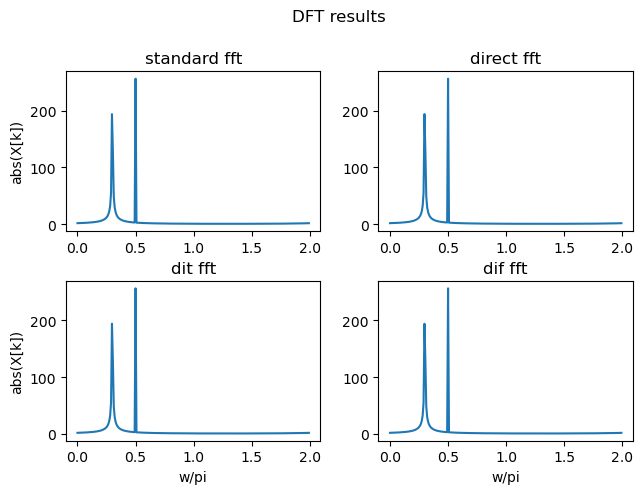

In [3]:
# 参数
w_0, w_1 = 0.3*np.pi, 0.5*np.pi
m = 8       # fft级数
N = 2**m    # 点数、

# 信号生成
x = np.exp(1j*w_0*np.arange(N)) + np.exp(1j*w_1*np.arange(N))

# numpy 库中的fft
y_standard = np.fft.fft(x,N)

# DFT定义实现
y_direct = standard_fft(x, m)

# dit实现
y_dit = dit_fft(x, m)

# dif实现
y_dif = dif_fft(x, m)

x_lim = np.arange(N)*2/N    # 横坐标，以pi为单位

# 画图
fig, ax = plt.subplots(2, 2)
fig.tight_layout(h_pad=2)

ax[0,0] = plt.subplot(2,2,1)
plt.title("standard fft")
plt.ylabel("abs(X[k])")
plt.plot(x_lim,np.abs(y_standard).squeeze())

ax[0,1] = plt.subplot(2,2,2) # 共享y轴
plt.title("direct fft")
plt.plot(x_lim,np.abs(y_direct).squeeze())

ax[1,0] = plt.subplot(2,2,3)
plt.title("dit fft")
plt.xlabel("w/pi")
plt.ylabel("abs(X[k])")
plt.plot(x_lim,np.abs(y_dit).squeeze())

ax[1,1] = plt.subplot(2,2,4)
plt.title("dif fft")
plt.xlabel("w/pi")
plt.plot(x_lim,np.abs(y_dif).squeeze())

fig.suptitle("DFT results")
plt.subplots_adjust(top=0.85)

plt.show()

## 运行时间分析
在序列长度为$2^N,N=10,11,\dots,16$情况下，比较四种dft算法的运行时间。信号同样定义为$x[n]=e^{j*0.3\pi *n}+e^{j*0.5\pi *n}$，点数定义为$N=500$.

In [4]:
def my_fft(x, m):
    """ 封装numpy库中的fft，与我的参数适配

    args:
        x: 输入序列
        m: 要做FFT点数的对数值
    """
    return np.fft.fft(x, 2**m)


In [5]:
# 参数
w_0, w_1 = 0.3 * np.pi, 0.5 * np.pi
N = 500  # 点数

# 信号生成
x = np.exp(1j * w_0 * np.arange(N)) + np.exp(1j * w_1 * np.arange(N))

dfts = [my_fft, standard_fft, dit_fft, dif_fft]
dft_str = ["standard fft", "direct dft", "dit fft", "dif fft"]

# 将结果记录在文件中 results.txt
file_name = "result1.txt"
file_record = open(file_name, "w")


# 统计时间
for m in range(10, 15, 1):
    for i in range(4):
        start_time = time.perf_counter()
        y = dfts[i](x, m)
        end_time = time.perf_counter()
        print(
            f"N={m}，{dft_str[i]},运行时间为{end_time-start_time}s",
            file=file_record,
            end="\n",
        )

dfts = [my_fft, standard_fft, dit_fft, dif_fft]
for m in range(15, 17, 1):
    for i in range(4):
        start_time = time.perf_counter()
        y = dfts[i](x, m)
        end_time = time.perf_counter()
        print(
            f"N={m}，{dft_str[i]},运行时间为{end_time-start_time}s",
            file=file_record,
            end="\n",
        )
file_record.close()

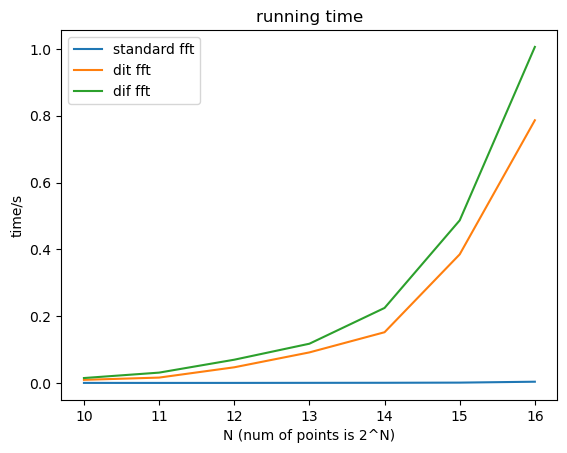

In [11]:
# 可以根据结果画出运行时间增长图，为了方便，这里直接手动输入每一个的时间
running_time = {
    "standard fft": np.array(
        [
            0.00016250000044237822,
            8.820000221021473e-05,
            0.00013949999993201345,
            0.00032210000790655613,
            0.0004988000000594184,
            0.0009898999996948987,
            0.0036914000083925202,
        ]
    ),
    "direct dft": np.array(
        [
            0.1653121999988798,
            0.6933854000089923,
            2.32417649999843,
            9.085251700002118,
            36.87646849999146,
            212.5897488000046,
            880.8838440000109,
        ]
    ),
    "dit fft": np.array(
        [
            0.00929710001219064,
            0.016064699986600317,
            0.04687510000076145,
            0.09147259999008384,
            0.15186399999947753,
            0.3850438999943435,
            0.7864888999902178,
        ]
    ),
    "dif fft": np.array(
        [
            0.014716499994392507,
            0.03093530000478495,
            0.06958590001158882,
            0.11747299999115057,
            0.22458340000594035,
            0.4868094999983441,
            1.006117400000221,
        ]
    ),
}
N_list = np.arange(10,17,1)
# 画曲线图
plt.title("running time")
plt.xlabel("N (num of points is 2^N)")
plt.ylabel("time/s")

for i in [0,2,3]:
    plt.plot(N_list, running_time[dft_str[i]])

plt.legend([dft_str[i] for i in [0,2,3]])
plt.show()